In [10]:
# Carrega pacotes 

import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, sin, log10, sqrt
from numpy.fft import fft, fftfreq, fftshift
from scipy.signal import convolve
import pandas as pd
from numpy.random import normal

pd.set_option("display.precision", 2)



In [13]:
def FIR_passaBaixa(Ωc, N):
    """
    Ωc : Frequência de corte do filtro (rad)
    N  : Ordem do filtro 
    
    """
    α = (N-1)/2
    
    # alocação de variáveis
    
    h = np.zeros((N, 1)); #Resposta ao impulso do filtro, coeficientes do filtro

    # calcula dos coeficientes do filtro

    for n in range(0,N):
        if n == α:
            h[n] = Ωc/np.pi
        else:
            h[n] = sin(Ωc*(n-α))/(np.pi*(n-α))

    return h

def FIR_passaAlta(Ωc, N):
    """
    Ωc : Frequência de corte do filtro (rad)
    N  : Ordem do filtro 
    
    """
    α = (N-1)/2
    
    # alocação de variáveis
    
    h = np.zeros((N, 1)); #Resposta ao impulso do filtro, coeficientes do filtro

    # calcula dos coeficientes do filtro

    for n in range(0,N):
        if n == α:
            h[n] = 1 - (Ωc/np.pi)
        else:
            h[n] = ( sin(np.pi*(n-α)) - sin(Ωc*(n-α)) )/(np.pi*(n-α))

    return h

def FIR_passaFaixa(Ωc1, Ωc2, N):
    """
    Ωc1 : Frequência de corte 1 do filtro (rad)
    Ωc2 : Frequência de corte 2 do filtro (rad)
    N  : Ordem do filtro 
    
    """
    α = (N-1)/2
    
    # alocação de variáveis
    
    h = np.zeros((N, 1)); #Resposta ao impulso do filtro, coeficientes do filtro

    # calcula dos coeficientes do filtro

    for n in range(0,N):
        if n == α:
            h[n] = (Ωc2 - Ωc1)/np.pi
        else:
            h[n] = ( sin(Ωc2*(n-α)) - sin(Ωc1*(n-α)) )/(np.pi*(n-α))

    return h

def FIR_rejeitaFaixa(Ωc1, Ωc2, N):
    """
    Ωc : Frequência de corte do filtro (rad)
    N  : Ordem do filtro 
    
    """
    α = (N-1)/2
    
    # alocação de variáveis
    
    h = np.zeros((N, 1)); #Resposta ao impulso do filtro, coeficientes do filtro

    # calcula dos coeficientes do filtro

    for n in range(0,N):
        if n == α:
            h[n] = 1+ (Ωc1 - Ωc2)/np.pi
        else:
            h[n] = ( sin(Ωc1*(n-α)) - sin(Ωc2*(n-α)) + sin(np.pi*(n-α)))/(np.pi*(n-α))

    return h


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199
h(n),-0.0010,-0.0026,-0.0033,-0.0027,-0.0010,0.0010,0.0028,0.0034,0.0028,0.0011,-0.0011,-0.0029,-0.0036,-0.0030,-0.0012,0.0012,0.0031,0.0039,0.0032,0.0012,-0.0012,-0.0033,-0.0041,-0.0034,-0.0013,0.0013,0.0035,0.0044,0.0036,0.0014,-0.0014,-0.0038,-0.0047,-0.0039,-0.0015,0.0015,0.0041,0.0051,0.0042,0.0016,-0.0017,-0.0044,-0.0055,-0.0046,-0.0018,0.0018,0.0048,0.0061,0.0050,0.0019,-0.0020,-0.0053,-0.0067,-0.0055,-0.0022,0.0022,0.0059,0.0075,0.0062,0.0024,-0.0025,-0.0067,-0.0085,-0.0071,-0.0028,0.0029,0.0077,0.0098,0.0082,0.0032,-0.0033,-0.0090,-0.0116,-0.0097,-0.0039,0.0040,0.0110,0.0141,0.0120,0.0048,-0.0050,-0.0139,-0.0182,-0.0156,-0.0063,0.0068,0.0191,0.0255,0.0224,0.0094,-0.0104,-0.0303,-0.0424,-0.0396,-0.0179,0.0219,0.0736,0.1273,0.1717,0.1967,0.1967,0.1717,0.1273,0.0736,0.0219,-0.0179,-0.0396,-0.0424,-0.0303,-0.0104,0.0094,0.0224,0.0255,0.0191,0.0068,-0.0063,-0.0156,-0.0182,-0.0139,-0.0050,0.0048,0.0120,0.0141,0.0110,0.0040,-0.0039,-0.0097,-0.0116,-0.0090,-0.0033,0.0032,0.0082,0.0098,0.0077,0.0029,-0.0028,-0.0071,-0.0085,-0.0067,-0.0025,0.0024,0.0062,0.0075,0.0059,0.0022,-0.0022,-0.0055,-0.0067,-0.0053,-0.0020,0.0019,0.0050,0.0061,0.0048,0.0018,-0.0018,-0.0046,-0.0055,-0.0044,-0.0017,0.0016,0.0042,0.0051,0.0041,0.0015,-0.0015,-0.0039,-0.0047,-0.0038,-0.0014,0.0014,0.0036,0.0044,0.0035,0.0013,-0.0013,-0.0034,-0.0041,-0.0033,-0.0012,0.0012,0.0032,0.0039,0.0031,0.0012,-0.0012,-0.0030,-0.0036,-0.0029,-0.0011,0.0011,0.0028,0.0034,0.0028,0.0010,-0.0010,-0.0027,-0.0033,-0.0026,-0.0010


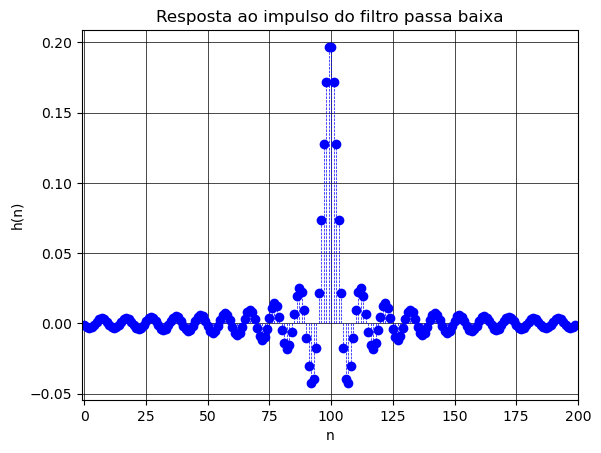

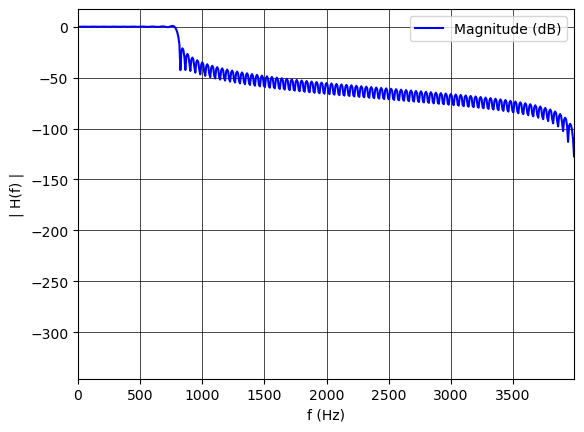

In [21]:
# Resposta ao impulso do sistema

N = 200  # Ordem do filtro
fs = 8000 # frequência de amostragem em Hz
fc = 800 # frequencia de corte do filtro em Hz

π=np.pi

ωs=2*π*fs
ωc=2*π*fc
T = 1/fs # Período de amostragem

# Conversão das frequências de amostragem e corte do filtro para  frequências digitais

Ωs = ωs*T
Ωc = ωc*T

n = range(0,N)


# Calculo da resposta em Frequencia de filtro
h = FIR_passaBaixa(Ωc, N)

# calculo da resposta em frequencia do filtro
Na = 1000 # número de amostras da FFT

H = fftshift(fft(h.flatten(), n=Na))
H = np.abs(H)
xf = fftshift(fftfreq(H.size, T))

#Plota gráficos
plt.figure()
(markers, stemlines, baseline) = plt.stem(n, h,'b',\
                                         \
                                         label = 'coeficientes h(n)')

plt.setp(baseline, visible=False)
plt.setp(markers, marker='o', markersize=5, markeredgecolor="b", markeredgewidth=2)
plt.setp(stemlines, linestyle="--", color="b", linewidth=0.5 )


plt.title('Resposta ao impulso do filtro passa baixa')
plt.xlim(-1,N)
plt.xlabel('n')
plt.ylabel('h(n)')
plt.grid(color='k', linestyle='-', linewidth=0.5)


plt.figure()
plt.plot(xf, 20*log10(H),'b',label = 'Magnitude (dB)')

plt.xlim(0,xf.max())
plt.xlabel('f (Hz)')
plt.ylabel('| H(f) |')
plt.legend()
plt.grid(color='k', linestyle='-', linewidth=0.5)


#Gera tabela com os coeficientes h(n)
pd.set_option('display.max_columns', 500)
pd.options.display.float_format = '{:,.4f}'.format
pd.DataFrame(np.hstack((h)), columns=["h(n)"]).T

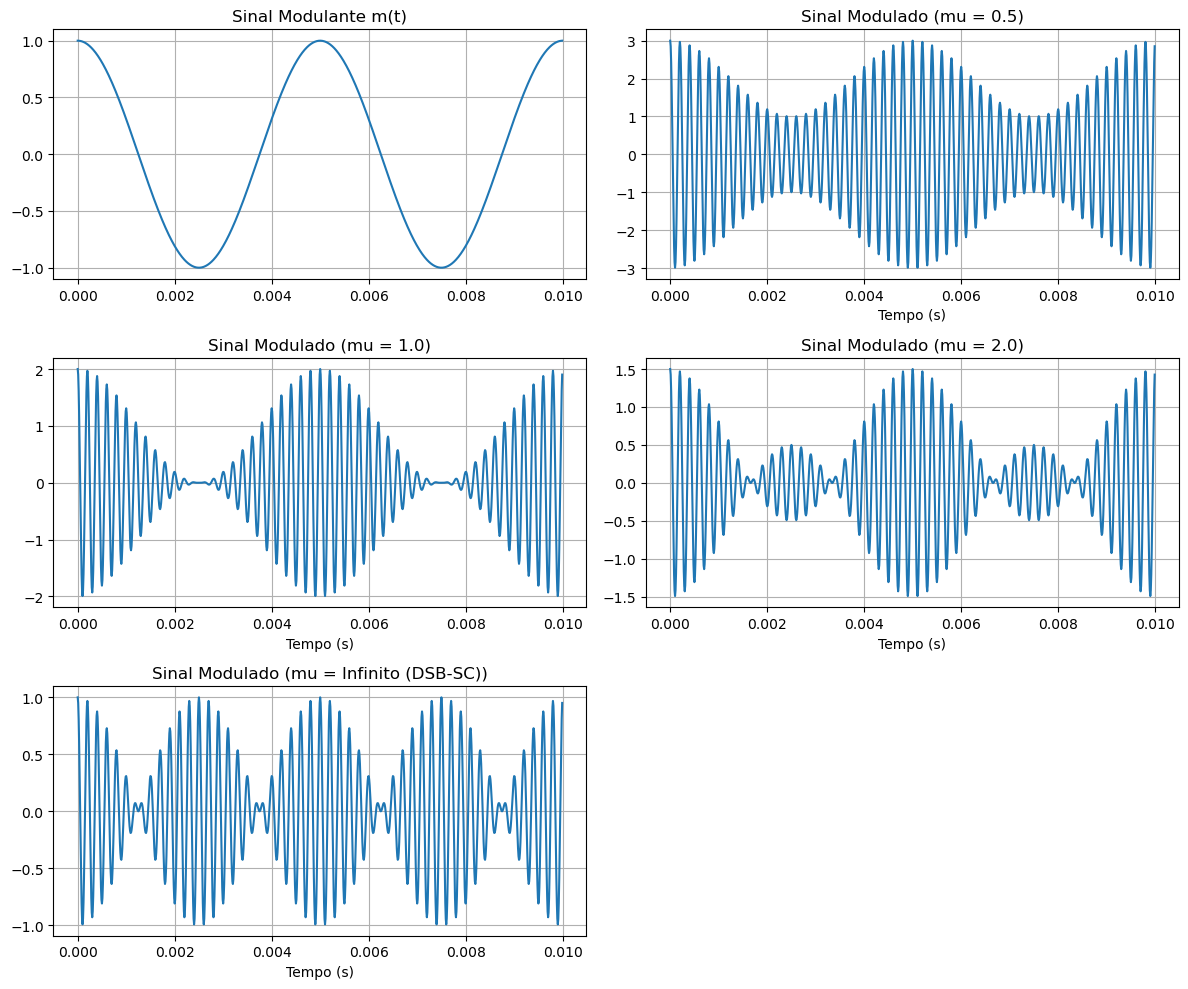

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros
fm = 200
fc = 5000
Fs = 100000 # Frequência de amostragem alta para ver a portadora
t = np.arange(0, 0.01, 1/Fs) # 10ms de sinal (2 ciclos do modulante)

mus = [0.5, 1.0, 2.0, np.inf]

plt.figure(figsize=(12, 10))

# Plot do Sinal Modulante m(t)
m_t = np.cos(2 * np.pi * fm * t)
plt.subplot(3, 2, 1)
plt.plot(t, m_t)
plt.title("Sinal Modulante m(t)")
plt.grid(True)

# Plots dos Sinais Modulados
for i, mu in enumerate(mus):
    if mu == np.inf:
        A = 0
        label = "Infinito (DSB-SC)"
    else:
        A = 1 / mu
        label = str(mu)
    
    phi_dsb = (A + m_t) * np.cos(2 * np.pi * fc * t)
    
    plt.subplot(3, 2, i+2) # Começa do plot 2
    plt.plot(t, phi_dsb)
    plt.title(f"Sinal Modulado (mu = {label})")
    plt.xlabel("Tempo (s)")
    plt.grid(True)

plt.tight_layout()
plt.show()